In [1]:
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import seaborn as sns
from scipy.special import kn,zetac
import pyslha
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

## Validation of efficiencies for a 1.4 TeV gluino and lifetime = 1ns

#### ATLAS Values

In [2]:
nobs = 0
bg = 0.02
bg_error = 0.02
lum = 32.7
xsecSRlimit = 0.0914421298569*1e-3 #(pb) From  statistics.upperLimit(0,0.02,0.02,32.7)
#gluino xsection at mgluino=1400: 25.2977*fb, weight for 1k events = 0.8272
atlasULs = np.genfromtxt('../recastCode/ATLAS_data/HEPData-ins1630632-v2-csv/Table13.csv',
                         delimiter=',',names=True,skip_header=10,skip_footer=65)

In [7]:
print(atlasULs)
print(atlasULs.dtype.names)

[( 100., 2.47892e-04) ( 200., 2.46502e-04) ( 400., 2.56908e-04)
 ( 600., 2.70476e-04) ( 800., 2.86434e-04) (1000., 3.92393e-04)
 (1200., 1.04252e-03) (1270., 2.04561e-03) (1300., 3.92301e-03)
 (1320., 6.21101e-03) (1350., 2.89410e-02) (1370., 6.41724e-01)]
('Neutralino1_mass_GeV', 'Observed_limit_pb')


#### Recasting values

In [9]:
#Get efficiencies
recastULs = []
for slhafile in glob.glob('mgluino1400_tau1ns/*.slha'):
    #Get c*tau:
    slhadata = pyslha.readSLHAFile(slhafile)
    mLSP = slhadata.blocks['MASS'][1000022]
    eff = 0
    #Get efficiency
    with open(slhafile.replace('.slha','.eff'),'r') as effFile:
        eff = [eval(x.split('Efficiency =')[1]) for x in effFile.read().split(',') if 'Efficiency' in x][0]
    recastULs.append([mLSP,xsecSRlimit/eff])
#Get upper limits:
recastULs = np.array(sorted(recastULs))

In [10]:
#Compute ratios
ratio = np.array([[pt[0],recastULs[i][1]/pt[1]] for i,pt in enumerate(atlasULs)])

#### Compare values

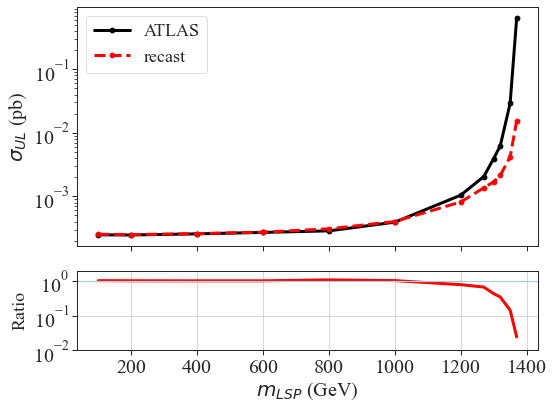

In [16]:
#Define subplots and their properties:
f, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[3, 1]},figsize=(8,6))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

#Plot curves
axarr[0].plot(atlasULs['Neutralino1_mass_GeV'],atlasULs['Observed_limit_pb'],'o-',color='black',linewidth=3.0,label='ATLAS')
axarr[0].plot(recastULs[:,0],recastULs[:,1],'o--',color='red',linewidth=3.0,label='recast')
axarr[0].set_ylabel(r'$\sigma_{UL}$ (pb)', fontsize=20)
axarr[0].set_yscale('log')
# axarr[0].set_xscale('log')
axarr[0].tick_params(labelsize=20)

#Plot ratio
axarr[1].plot(ratio[:,0],ratio[:,1],color='red',linewidth=3.0)
axarr[1].axhline(y=1.)
axarr[1].set_ylabel('Ratio', fontsize=18) #Y-label
axarr[1].set_yscale('log')
axarr[1].set_xlabel(r'$m_{LSP}$ (GeV)', fontsize=20)
axarr[1].set_ylim(1e-2,2.0)
axarr[1].set_yticks([1e-2,1e-1,1])
axarr[1].grid(True)
axarr[1].tick_params(labelsize=20)
axarr[0].legend(fontsize=18)
f.tight_layout()
plt.show()

In [17]:
f.savefig('validationPlot_mgluino1400_tau1ns.png')
f.savefig('validationPlot_mgluino1400_tau1ns.pdf')